#### Pick a dataset you want to work on 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as sk
from IPython.display import display 

In [2]:
df = pd.read_csv('possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
df = df[['eye', 'chest', 'belly', 'skullw']]

In [4]:
df

,eye,chest,belly,skullw
0,15.2,28.0,36.0,60.4
1,16.0,28.5,33.0,57.6
2,15.5,30.0,34.0,60.0
3,15.2,28.0,34.0,57.1
4,15.1,28.5,33.0,56.3
...,...,...,...,...
99,14.8,23.0,27.0,56.0
100,14.0,25.0,33.0,54.7
101,13.0,25.0,30.0,55.0
102,15.4,25.0,29.0,55.2


In [5]:
df.isna().sum()

eye       0
chest     0
belly     0
skullw    0
dtype: int64

In [6]:
X = df.drop('skullw', axis=1)
Y = df.skullw
display(X, Y)

,eye,chest,belly
0,15.2,28.0,36.0
1,16.0,28.5,33.0
2,15.5,30.0,34.0
3,15.2,28.0,34.0
4,15.1,28.5,33.0
...,...,...,...
99,14.8,23.0,27.0
100,14.0,25.0,33.0
101,13.0,25.0,30.0
102,15.4,25.0,29.0


0      60.4
1      57.6
2      60.0
3      57.1
4      56.3
       ... 
99     56.0
100    54.7
101    55.0
102    55.2
103    59.9
Name: skullw, Length: 104, dtype: float64

#### Split into train and test sets 

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.14, shuffle=True)

display(Xtrain, Xtest, Ytrain, Ytest)

,eye,chest,belly
8,15.5,28.0,33.0
6,14.2,30.0,34.5
10,14.9,31.0,34.0
86,15.0,26.0,36.0
74,16.9,26.0,33.5
...,...,...,...
16,14.7,29.0,31.0
100,14.0,25.0,33.0
30,14.5,27.0,31.0
47,17.0,28.0,35.0


,eye,chest,belly
3,15.2,28.0,34.0
61,16.0,27.0,32.0
1,16.0,28.5,33.0
70,15.0,27.5,34.0
40,15.9,27.0,30.5
48,15.9,29.5,35.5
45,14.4,24.5,35.0
57,14.4,30.5,33.0
21,16.2,28.0,36.0
25,15.0,29.0,38.0


8      56.3
6      58.2
10     57.2
86     60.7
74     58.1
       ... 
16     67.7
100    54.7
30     54.1
47     63.2
66     57.6
Name: skullw, Length: 89, dtype: float64

3      57.1
61     58.0
1      57.6
70     57.6
40     57.0
48     59.2
45     54.4
57     64.2
21     58.5
25     59.0
49     56.4
33     55.7
103    59.9
27     56.8
73     52.0
Name: skullw, dtype: float64

#### See if we can use some variables to predict another variable. 

In [8]:
eye = Xtrain['eye'].to_numpy()
skullw = Ytrain.copy().to_numpy()

display(eye, eye.shape, 
skullw, skullw.shape)

array([15.5, 14.2, 14.9, 15. , 16.9, 13.6, 15. , 13.6, 13.8, 16.4, 14.5,
       15. , 16.2, 14.1, 15. , 15.4, 17. , 15.9, 14.5, 14.4, 17.4, 16. ,
       14.8, 16.2, 16.4, 16. , 14.6, 15. , 14.8, 13. , 15.1, 14.4, 16.3,
       15.8, 14.5, 12.8, 15.2, 16.5, 15.7, 14.4, 14.7, 14.2, 14.5, 14. ,
       14.2, 15.2, 15.5, 13. , 14.9, 14.2, 14.9, 17.5, 15.4, 14.4, 14.9,
       14.4, 13.6, 16.4, 15.5, 15.1, 14. , 14.5, 14.5, 14.5, 14.5, 15.3,
       13. , 13.4, 14.9, 14. , 15.2, 14. , 15.7, 14. , 13.2, 14.4, 15.4,
       15.3, 17.8, 17.1, 15.8, 17.4, 14.8, 15. , 14.7, 14. , 14.5, 17. ,
       16.5])

(89,)

array([56.3, 58.2, 57.2, 60.7, 58.1, 54.8, 52.6, 53.2, 54.1, 63.2, 54.4,
       59.6, 56.2, 52.4, 59. , 56.1, 56. , 56. , 54.6, 58.4, 56. , 58. ,
       54.6, 54.9, 57.9, 52.3, 55.9, 54.8, 50. , 55. , 56.3, 58. , 54.6,
       61. , 53.1, 54. , 55.4, 58.1, 55.8, 57.6, 62.8, 58.1, 56.2, 56.2,
       54.5, 56.4, 56.3, 51.5, 58.5, 54.8, 56.6, 63. , 55.2, 57.7, 56.7,
       51.5, 55. , 61.5, 60. , 57.6, 55.7, 59.4, 57.6, 56.3, 68.6, 55.6,
       56.4, 55.5, 59.3, 53.8, 60.4, 57.4, 57.6, 56. , 51. , 56. , 54. ,
       55.7, 56.8, 56.5, 59.9, 59.6, 56. , 55.6, 67.7, 54.7, 54.1, 63.2,
       57.6])

(89,)

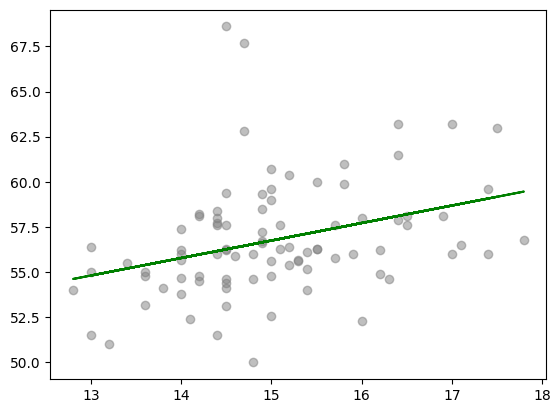

In [9]:
a = sum(eye*skullw - skullw.mean()*eye) / sum(eye**2 - eye.mean()*eye)
b = skullw.mean() - a*eye.mean()
Yhat = a*eye + b 

plt.scatter(eye, skullw, c='gray', alpha=0.5)
plt.plot(eye, Yhat, c='green')
plt.show()

#### Measure the accuracy of your model on the train and test data. 

In [10]:
train_r2 = 1 - ((skullw-Yhat)**2).sum() / ((skullw-skullw.mean())**2).sum()
train_r2

0.11326142774189496

In [11]:
eye_test = Xtest['eye'].to_numpy()
skullw_test = Ytest.copy().to_numpy()

Yhat_test = a*eye_test + b 

test_r2 = 1 - ((skullw_test-Yhat_test)**2).sum() / ((skullw_test-skullw_test.mean())**2).sum()
test_r2

-0.057946556743439404

#### Plot each independent variable against the dependent variable, do simple linear regression in 1-D, which one gives the best R2?

In [27]:
def lr(X, Y, plot=False): 
    
    name = X.name
    X = X.to_numpy()

    a = sum(X*Y - Y.mean()*X) / sum(X**2 - X.mean()*X)
    b = Y.mean() - a*X.mean()
    Yhat = a*X + b 

    if plot==True: 
        plt.scatter(X, Y, c='gray', alpha=0.2)
        plt.plot(X, Yhat, c='green', label=name)
        plt.legend()
        plt.show()

    r2 = 1 - ((Y-Yhat)**2).sum() / ((Y-Y.mean())**2).sum()
    return r2

In [18]:
all_r2 = []
for feature in Xtrain.columns:
    all_r2.append(lr(Xtrain[feature], Ytrain))
all_r2

[0.11326142774189496, 0.3661172336603251, 0.2359487786310388]

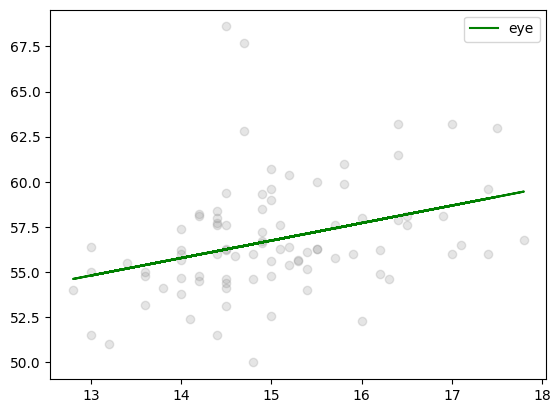

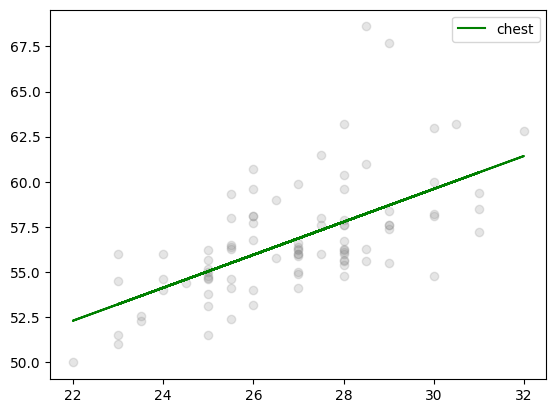

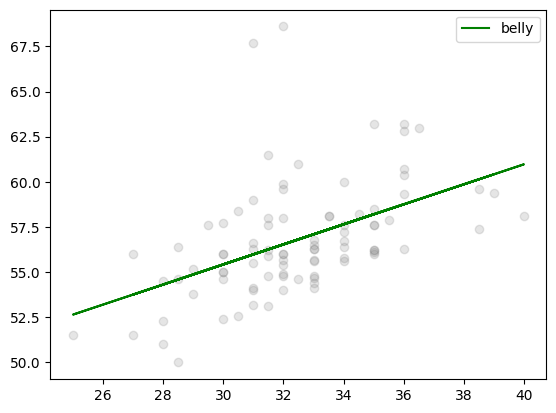

In [28]:
for feature in Xtrain.columns:
    lr(Xtrain[feature], Ytrain, plot=True)

#### Determine how many variables you actually need to get the best R2 on the test set.

In [29]:
test_r2 = []
for feature in Xtest.columns:
    test_r2.append(lr(Xtest[feature], Ytest))
test_r2

[0.01149840089039389, 0.7214173189144271, 0.013633391188747734]

I think it's safe to say we only need the 'chest' feature to get the best score on the test set. 

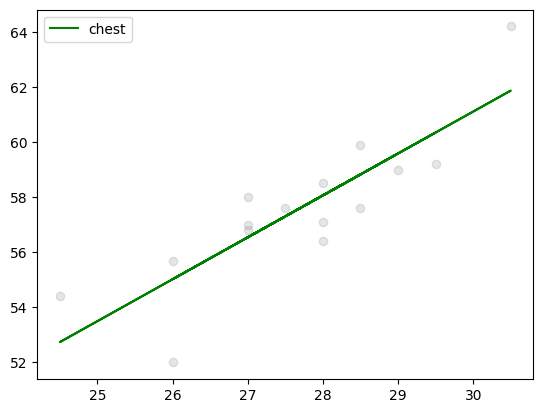

0.7214173189144271

In [30]:
lr(Xtest['chest'], Ytest, plot=True)